# EDA on movie data


In [5]:
# Run this cell to ensure that altair plots show up in the exported HTML
# and that the R cell magic works
import altair as alt
import pandas as pd
# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')

# Load the R cell magic
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


## Python

In [6]:
movies = pd.read_json("data/lab2-movies.json")
movies.head()

,id,title,runtime,budget,revenue,vote_average,vote_count,genres,studios
0,12,Finding Nemo,100,94000000,940335536,3.86,33887,[Animation],[Pixar Animation Studios]
1,13,Forrest Gump,142,55000000,677945399,4.05,91921,"[Romance, Comedy, Drama]",[Paramount Pictures]
2,14,American Beauty,122,15000000,356296601,4.13,57879,[Drama],[DreamWorks SKG]
3,16,Dancer in the Dark,140,12800000,40031879,3.84,4571,[Drama],[Canal+]
4,22,Pirates of the Caribbean: The Curse of the Bla...,143,140000000,655011224,3.81,36337,[Action],[Walt Disney Pictures]


In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1008 entries, 0 to 1007
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1008 non-null   int64  
 1   title         1008 non-null   object 
 2   runtime       1008 non-null   int64  
 3   budget        1008 non-null   int64  
 4   revenue       1008 non-null   int64  
 5   vote_average  1008 non-null   float64
 6   vote_count    1008 non-null   int64  
 7   genres        1008 non-null   object 
 8   studios       1008 non-null   object 
dtypes: float64(1), int64(5), object(3)
memory usage: 78.8+ KB


In [8]:
movies.describe()

,id,runtime,budget,revenue,vote_average,vote_count
count,1008.000000,1008.000000,1.008000e+03,1.008000e+03,1008.000000,1008.000000
mean,49888.699405,112.183532,5.940012e+07,1.878759e+08,3.240198,6907.056548
std,88325.959056,21.527725,5.525947e+07,2.449621e+08,0.471919,10794.341581
min,12.000000,63.000000,5.000000e+00,8.500000e+01,1.610000,11.000000
25%,3627.000000,96.000000,2.000000e+07,4.127994e+07,2.947500,857.000000
50%,10432.500000,108.000000,4.000000e+07,1.018510e+08,3.265000,2688.000000
75%,44658.750000,125.000000,8.000000e+07,2.270864e+08,3.590000,8774.000000
max,417644.000000,202.000000,3.800000e+08,2.787965e+09,4.430000,91921.000000


### Summary
> There are 1008 entries with 9 variables and no null values. 

## R

In [9]:
%%R
library(rjson)
library(tidyverse)
movies <- fromJSON(file = 'data/lab2-movies.json') %>%
    as_tibble() %>%
    unnest(-c(studios, genres))

head(movies)

# A tibble: 6 x 9
     id title     runtime  budget revenue vote_average vote_count genres studios
  <dbl> <chr>       <dbl>   <dbl>   <dbl>        <dbl>      <dbl> <name> <named>
1    12 Finding …     100  9.40e7  9.40e8         3.86      33887 <chr … <chr […
2    13 Forrest …     142  5.50e7  6.78e8         4.05      91921 <chr … <chr […
3    14 American…     122  1.50e7  3.56e8         4.13      57879 <chr … <chr […
4    16 Dancer i…     140  1.28e7  4.00e7         3.84       4571 <chr … <chr […
5    22 Pirates …     143  1.40e8  6.55e8         3.81      36337 <chr … <chr […
6    58 Pirates …     151  2.00e8  1.07e9         3.47      15079 <chr … <chr […


In [10]:
%%R
glimpse(movies)

Rows: 1,008
Columns: 9
$ id           <dbl> 12, 13, 14, 16, 22, 58, 59, 70, 73, 74, 76, 78, 85, 87, …
$ title        <chr> "Finding Nemo", "Forrest Gump", "American Beauty", "Danc…
$ runtime      <dbl> 100, 142, 122, 140, 143, 151, 96, 132, 119, 116, 105, 11…
$ budget       <dbl> 9.40e+07, 5.50e+07, 1.50e+07, 1.28e+07, 1.40e+08, 2.00e+…
$ revenue      <dbl> 940335536, 677945399, 356296601, 40031879, 655011224, 10…
$ vote_average <dbl> 3.86, 4.05, 4.13, 3.84, 3.81, 3.47, 3.63, 3.84, 4.15, 3.…
$ vote_count   <dbl> 33887, 91921, 57879, 4571, 36337, 15079, 5082, 13901, 31…
$ genres       <named list> ["Animation", <"Romance", "Comedy", "Drama">, "Dr…
$ studios      <named list> ["Pixar Animation Studios", "Paramount Pictures",…


In [11]:
%%R
movies %>%
    select_if(is.numeric) %>%
    summary()

       id            runtime          budget            revenue         
 Min.   :    12   Min.   : 63.0   Min.   :5.00e+00   Min.   :8.500e+01  
 1st Qu.:  3627   1st Qu.: 96.0   1st Qu.:2.00e+07   1st Qu.:4.128e+07  
 Median : 10432   Median :108.0   Median :4.00e+07   Median :1.019e+08  
 Mean   : 49889   Mean   :112.2   Mean   :5.94e+07   Mean   :1.879e+08  
 3rd Qu.: 44659   3rd Qu.:125.0   3rd Qu.:8.00e+07   3rd Qu.:2.271e+08  
 Max.   :417644   Max.   :202.0   Max.   :3.80e+08   Max.   :2.788e+09  
  vote_average     vote_count   
 Min.   :1.610   Min.   :   11  
 1st Qu.:2.947   1st Qu.:  857  
 Median :3.265   Median : 2688  
 Mean   :3.240   Mean   : 6907  
 3rd Qu.:3.590   3rd Qu.: 8774  
 Max.   :4.430   Max.   :91921  


# Vote Average Distribution

# Python 

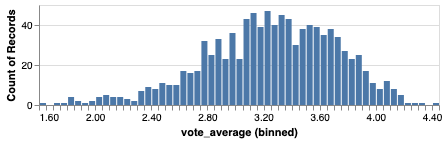

In [17]:
alt.Chart(movies).mark_bar().encode(
    x=alt.X('vote_average', bin=alt.Bin(maxbins=100)),
    y=alt.Y('count()')
).properties(
    height=100)

# R

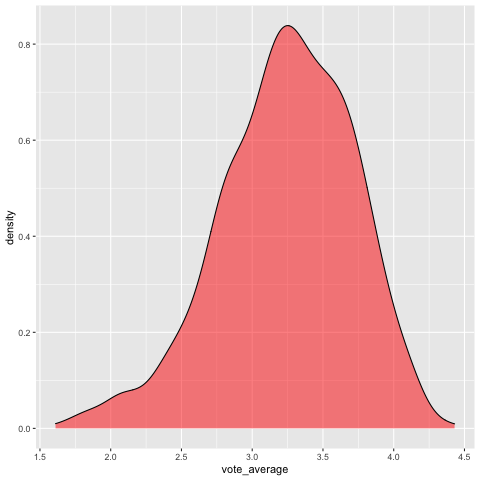

In [18]:
%%R
ggplot(movies, aes(x=vote_average)) +
       geom_density(alpha=0.5, fill="red")

# Pairwise numerical columns

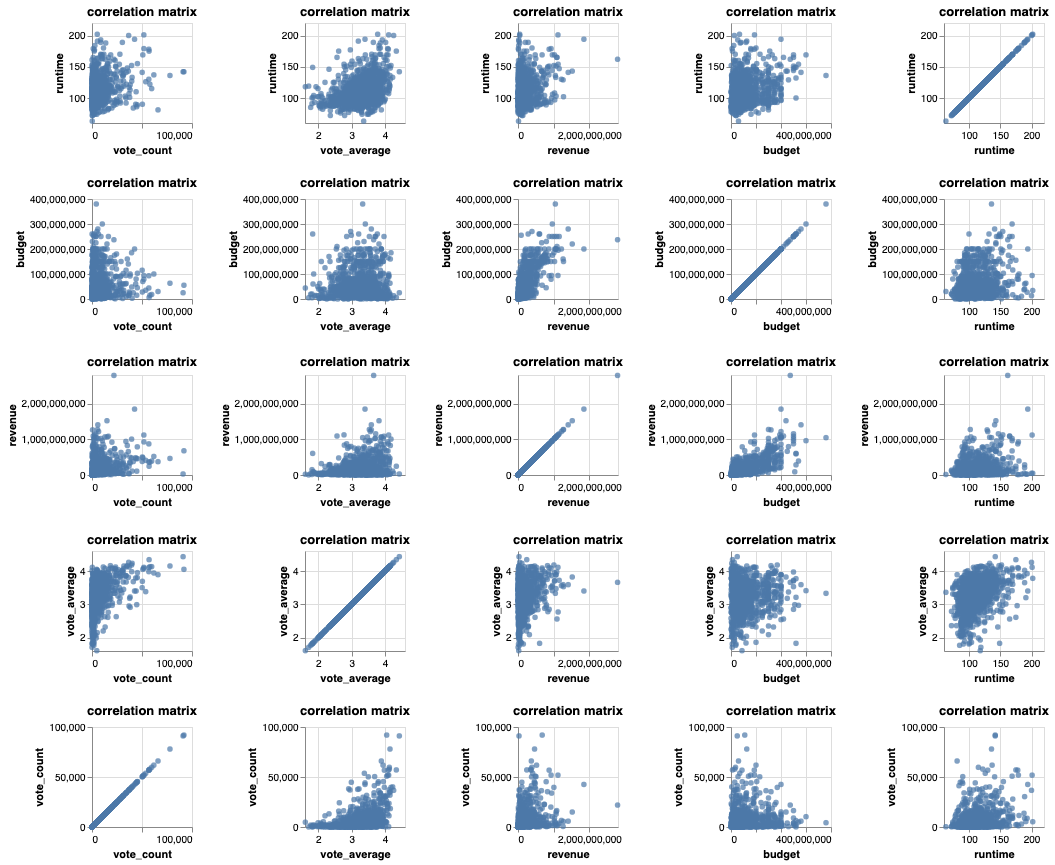

In [21]:
col_names = list(movies.select_dtypes(include=['number']).columns)[1:]

alt.Chart(movies, title = "correlation matrix").mark_circle().encode(
    x=alt.X(alt.repeat("column"), type='quantitative', scale=alt.Scale(zero=False)),
    y=alt.Y(alt.repeat("row"), type='quantitative', scale=alt.Scale(zero=False)),
).properties(
    height=100,
    width=100
).repeat(
    row=col_names, 
    column=col_names[::-1]
)

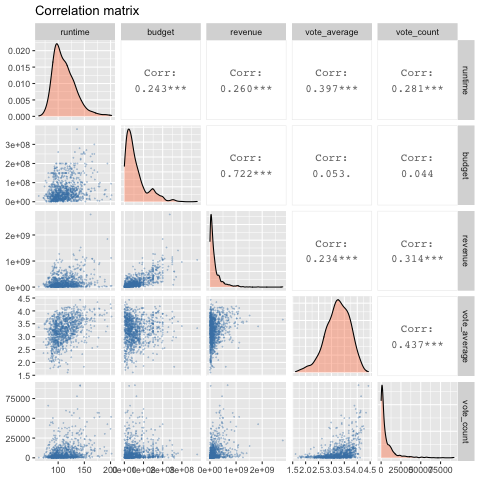

In [226]:
%%R
library(GGally)

ggpairs(
  numeric_cols,
  title = "Correlation matrix",
  lower = list(continuous = GGally::wrap('points', alpha = 0.3, size=0.1, color = 'steelblue')),
  diag = list(continuous = GGally::wrap('densityDiag', fill = 'coral', alpha = 0.4)),
  progress = FALSE,
)

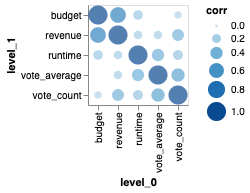

In [22]:
corr_df = movies[col_names].corr('spearman').stack().reset_index(name='corr')
alt.Chart(corr_df).mark_circle().encode(
    x='level_0',
    y='level_1',
    size='corr',
    color='corr')

R[write to console]: Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



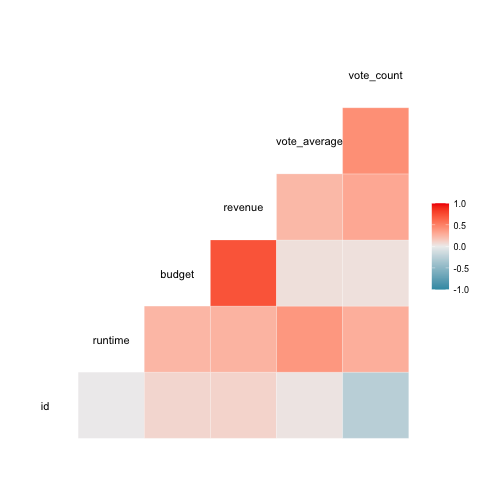

In [23]:
%%R
GGally::ggcorr(movies)

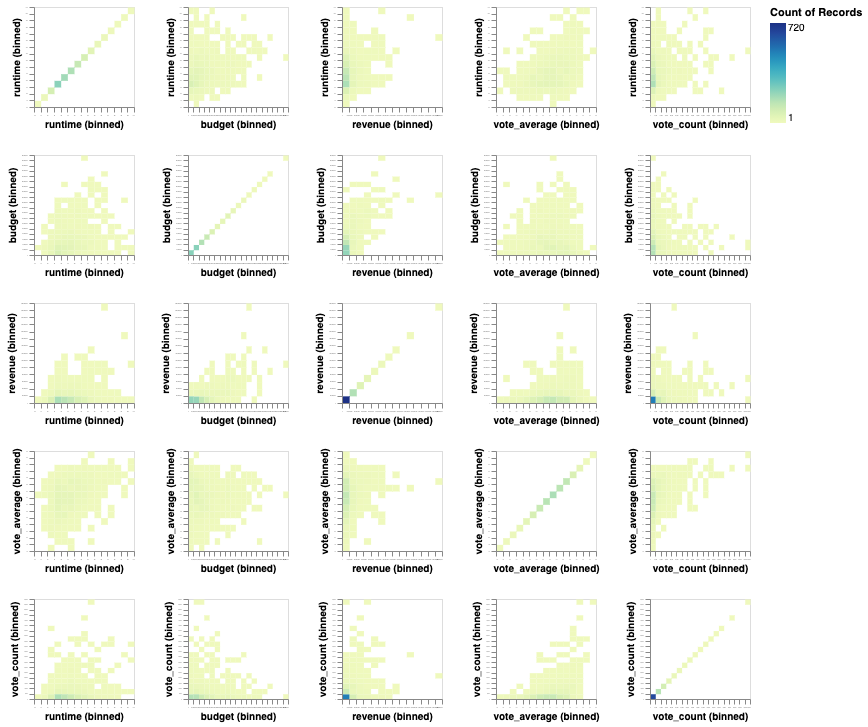

In [25]:
(alt.Chart(movies).mark_rect().encode(
    alt.X(alt.repeat('column'), type='quantitative', scale=alt.Scale(zero=False), bin=alt.Bin(maxbins=25)),
    alt.Y(alt.repeat('row'), type='quantitative',  scale=alt.Scale(zero=False),  bin=alt.Bin(maxbins=25)),
    color='count()')
 .properties(height=100, width=100)
 .repeat(row=col_names, column=col_names)).configure_axis(titleFontSize=10, labelFontSize=1)

# EDA of numerical columns conditioned on a categorical column (genres, studios)

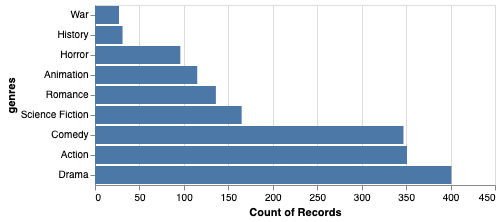

In [39]:
boom_genres = movies.explode('genres')
alt.Chart(boom_genres).mark_bar().encode(
    x='count()',
    y=alt.Y('genres', sort='x'))

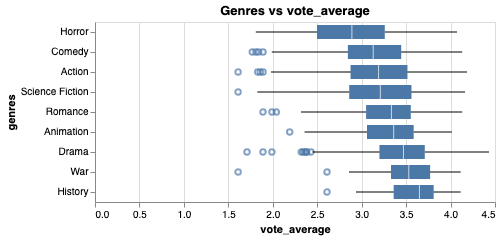

In [40]:

genres_by_vote_average = boom_genres.groupby('genres')['vote_average'].median().sort_values().index.tolist()

alt.Chart(boom_genres, title="Genres vs vote_average").mark_boxplot().encode(
    x=alt.X('vote_average'),
    y=alt.Y('genres', sort=genres_by_vote_average), 
    tooltip='title'
)
    


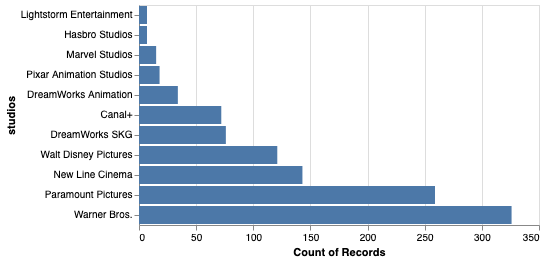

In [43]:
boom_studios = movies.explode('studios')

alt.Chart(boom_studios).mark_bar().encode(
    x='count()',
    y=alt.Y('studios', sort='x'))

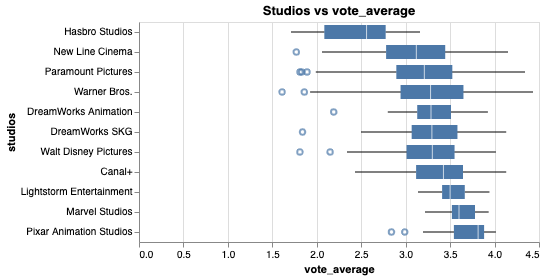

In [44]:

studios_by_vote_average = boom_studios.groupby('studios')['vote_average'].median().sort_values().index.tolist()

alt.Chart(boom_studios, title="Studios vs vote_average").mark_boxplot().encode(
    x=alt.X('vote_average'),
    y=alt.Y('studios', sort=studios_by_vote_average), 
    tooltip='title'
)

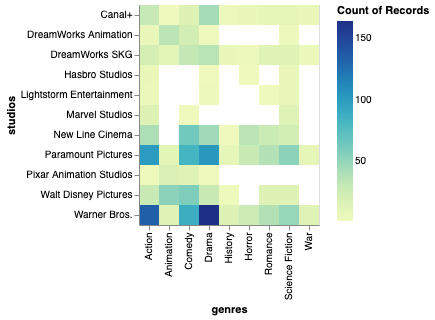

In [46]:
double_boom = movies.explode('studios').explode('genres')

alt.Chart(double_boom).mark_rect().encode(
    x='genres',
    y='studios',
    color='count()')

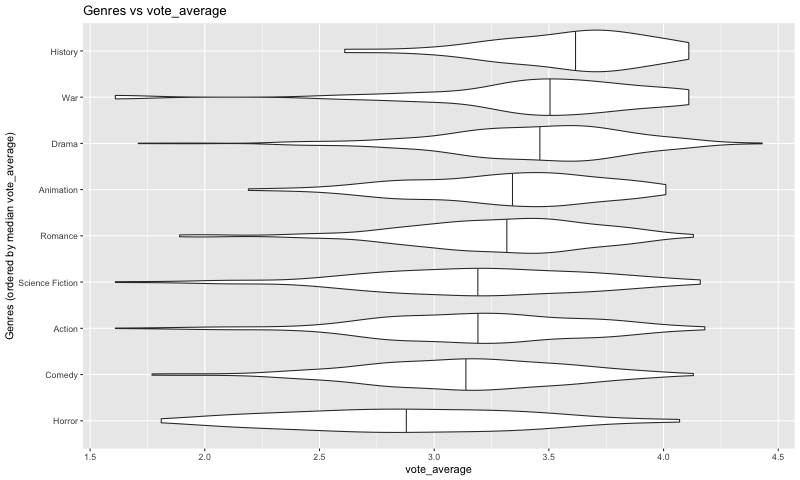

In [28]:
%%R -w 800
free_genres <- movies %>% unnest(genres) 
free_genres <- free_genres %>%
    group_by(genres) %>%
    mutate(median_vote_average = median(vote_average)) 

ggplot(free_genres, aes(x = vote_average, y = reorder(genres, median_vote_average))) + 
  geom_violin(draw_quantiles = 0.5) + 
    ylab('Genres (ordered by median vote_average)') +  
    ggtitle('Genres vs vote_average')   


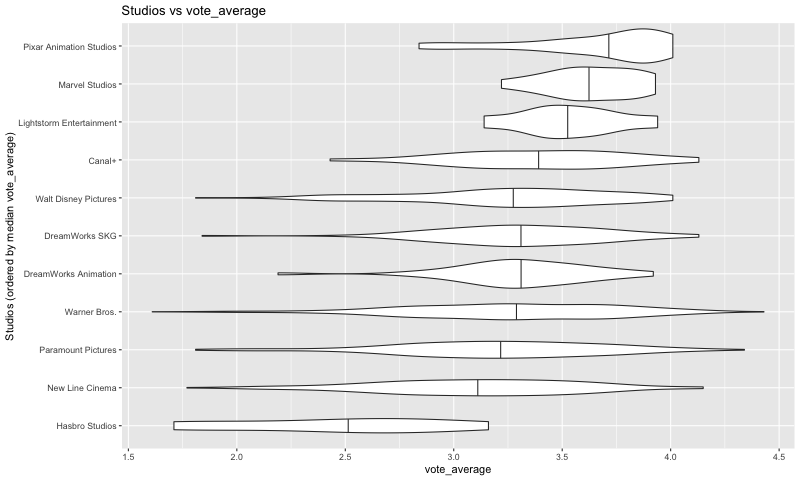

In [31]:
%%R -w 800

free_studios <- movies %>% unnest(studios) 
free_studios <- free_studios %>%
    group_by(studios) %>%
    mutate(median_vote_average = median(vote_average)) 

ggplot(free_studios, aes(x = vote_average, y = reorder(studios, median_vote_average))) + 
  geom_violin(draw_quantiles = 0.5) + 
    ylab('Studios (ordered by median vote_average)') +  
    ggtitle('Studios vs vote_average') 

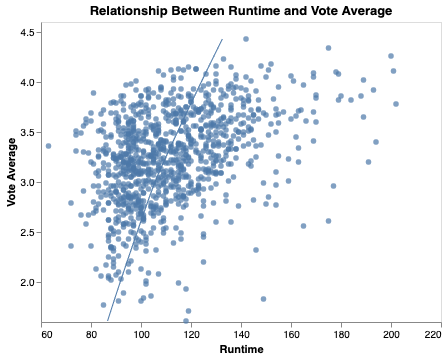

In [36]:
points = alt.Chart(movies, title="Relationship Between Runtime and Vote Average").mark_circle().encode(
    y=alt.Y('vote_average', scale=alt.Scale(zero=False), title="Vote Average", axis=alt.Axis(grid=False)),
    x=alt.X('runtime', scale=alt.Scale(zero=False), title="Runtime", axis=alt.Axis(grid=False)), 
    #color=alt.Color('', title=""), 
    tooltip= ['runtime', 'title', 'vote_average'])

points + (points.transform_loess(
    'vote_average', 'runtime', bandwidth=1)
.mark_line(size=1))


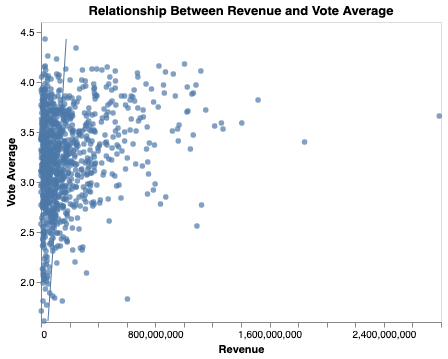

In [37]:
points = alt.Chart(movies, title="Relationship Between Revenue and Vote Average").mark_circle().encode(
    y=alt.Y('vote_average', scale=alt.Scale(zero=False), title="Vote Average", axis=alt.Axis(grid=False)),
    x=alt.X('revenue', scale=alt.Scale(zero=False), title="Revenue", axis=alt.Axis(grid=False)), 
    #color=alt.Color('', title=""), 
    tooltip= ['revenue', 'title', 'vote_average'])

points + (points.transform_loess(
    'vote_average', 'revenue', bandwidth=1)
.mark_line(size=1))

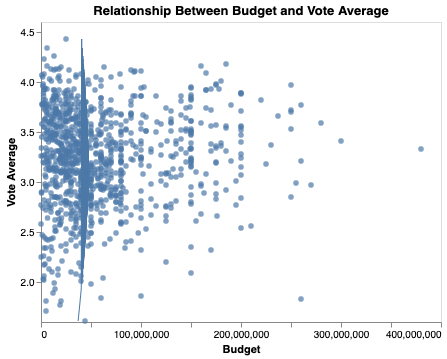

In [38]:
points = alt.Chart(movies, title="Relationship Between Budget and Vote Average").mark_circle().encode(
    y=alt.Y('vote_average', scale=alt.Scale(zero=False), title="Vote Average", axis=alt.Axis(grid=False)),
    x=alt.X('budget', scale=alt.Scale(zero=False), title="Budget", axis=alt.Axis(grid=False)), 
    #color=alt.Color('', title=""), 
    tooltip= ['budget', 'title', 'vote_average'])

points + (points.transform_loess(
    'vote_average', 'budget', bandwidth=1)
.mark_line(size=1))